# Endterm
## Heart disease prediction
### Abdireshov, Aisagaliyev, Abdiyev, BD-2004

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [2]:
#information about dataset
df.shape

(319795, 18)

In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Data preprocessing

In [6]:
#checking for value counts of each column
for column in df.columns:
    print(df[column].value_counts().head())

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
Name: BMI, dtype: int64
No     187887
Yes    131908
Name: Smoking, dtype: int64
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
No     307726
Yes     12069
Name: Stroke, dtype: int64
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
Name: PhysicalHealth, dtype: int64
0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
Name: MentalHealth, dtype: int64
No     275385
Yes     44410
Name: DiffWalking, dtype: int64
Female    167805
Male      151990
Name: Sex, dtype: int64
65-69    34151
60-64    33686
70-74    31065
55-59    29757
50-54    25382
Name: AgeCategory, dtype: int64
White       245212
Hispanic     27446
Black        22939
Other        10928
Asian         8068
Name: Race, dtype: int64
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (

In [7]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [8]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [9]:
#replace "80 or older" value to 80-100 to analyse better
df['AgeCategory'].replace("80 or older", "80-100", inplace=True)

In [10]:
#checking
df[df['AgeCategory']=='80-100']

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80-100,White,No,Yes,Very good,7.0,No,No,No
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80-100,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80-100,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
13,No,28.15,No,No,No,7.0,0.0,Yes,Female,80-100,White,No,No,Good,7.0,No,No,No
19,No,18.13,No,No,No,0.0,0.0,No,Male,80-100,White,No,Yes,Excellent,8.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319606,No,23.44,No,No,No,0.0,0.0,No,Female,80-100,Hispanic,No,Yes,Very good,7.0,No,No,No
319615,No,29.54,Yes,No,No,0.0,0.0,No,Male,80-100,Hispanic,Yes,No,Good,8.0,No,No,No
319720,No,25.61,No,No,No,0.0,0.0,Yes,Male,80-100,Hispanic,No,No,Very good,8.0,No,No,No
319730,No,26.94,No,No,No,0.0,0.0,No,Female,80-100,Hispanic,Yes,No,Fair,9.0,No,No,No


In [11]:
#checking for datatypes
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [12]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80-100,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [13]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [14]:
#changing categorical values to numerical using .map
df['GenHealth'] = df['GenHealth'].map({'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4})

In [15]:
df['GenHealth'].value_counts()

3    113858
2     93129
4     66842
1     34677
0     11289
Name: GenHealth, dtype: int64

In [16]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [17]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [18]:
#
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.iloc[:,:].values

labelencoder_x = LabelEncoder()
X[:,0] = labelencoder_x.fit_transform(X[:,0])
X[:,2] = labelencoder_x.fit_transform(X[:,2])
X[:,3] = labelencoder_x.fit_transform(X[:,3])
X[:,4] = labelencoder_x.fit_transform(X[:,4])
X[:,7] = labelencoder_x.fit_transform(X[:,7])
X[:,8] = labelencoder_x.fit_transform(X[:,8])
X[:,9] = labelencoder_x.fit_transform(X[:,9])
X[:,11] = labelencoder_x.fit_transform(X[:,11])
X[:,12] = labelencoder_x.fit_transform(X[:,12])
X[:,15] = labelencoder_x.fit_transform(X[:,15])
X[:,16] = labelencoder_x.fit_transform(X[:,16])
X[:,17] = labelencoder_x.fit_transform(X[:,17])

Z = pd.DataFrame(X)

Z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,16.6,1,0,0,3.0,30.0,0,0,7,White,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,White,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,White,0,1,3,8.0,0,0,0


In [19]:
df_new = Z.rename({0: 'HeartDisease', 1: 'BMI',2:'Smoking',3:'AlcoholDrinking',4:'Stroke',
               5:'PhysicalHealth',6:'MentalHealth',7:'DiffWalking',8:'Sex',9:'AgeCategory',10:'Race',
               11:'Diabetic',12:'PhysicalActivity',13:'GenHealth',14:'SleepTime',15:'Asthma',
               16:'KidneyDisease',17:'SkinCancer',18:'avg_age',}, axis=1)
df_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.6,1,0,0,3.0,30.0,0,0,7,White,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,White,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,White,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,Hispanic,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,Hispanic,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,Hispanic,0,0,2,12.0,0,0,0


In [20]:
df_new['race_white'] = df['Race'].apply(lambda x: 1 if 'white' in x.lower() else 0)
df_new['race_hispanic'] = df['Race'].apply(lambda x: 1 if 'hispanic' in x.lower() else 0)
df_new['race_black'] = df['Race'].apply(lambda x: 1 if 'black' in x.lower() else 0)
df_new['race_other'] = df['Race'].apply(lambda x: 1 if 'other' in x.lower() else 0)
df_new['race_asia'] = df['Race'].apply(lambda x: 1 if 'asian' in x.lower() else 0)
df_new['race_american'] = df['Race'].apply(lambda x: 1 if 'american' in x.lower() else 0)

In [21]:
df_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,race_white,race_hispanic,race_black,race_other,race_asia,race_american
0,0,16.6,1,0,0,3.0,30.0,0,0,7,...,5.0,1,0,1,1,0,0,0,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,7.0,0,0,0,1,0,0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,8.0,1,0,0,1,0,0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,6.0,0,0,1,1,0,0,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,8.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,...,6.0,1,0,0,0,1,0,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,...,5.0,1,0,0,0,1,0,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,...,6.0,0,0,0,0,1,0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,...,12.0,0,0,0,0,1,0,0,0,0


In [22]:
print(df['Race'].value_counts())
print(df_new['race_white'].value_counts())
print(df_new['race_hispanic'].value_counts())
print(df_new['race_black'].value_counts())
print(df_new['race_other'].value_counts())
print(df_new['race_asia'].value_counts())
print(df_new['race_american'].value_counts())

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64
1    245212
0     74583
Name: race_white, dtype: int64
0    292349
1     27446
Name: race_hispanic, dtype: int64
0    296856
1     22939
Name: race_black, dtype: int64
0    308867
1     10928
Name: race_other, dtype: int64
0    311727
1      8068
Name: race_asia, dtype: int64
0    314593
1      5202
Name: race_american, dtype: int64


# Visualization

In [23]:
df_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,race_white,race_hispanic,race_black,race_other,race_asia,race_american
0,0,16.6,1,0,0,3.0,30.0,0,0,7,...,5.0,1,0,1,1,0,0,0,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,7.0,0,0,0,1,0,0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,8.0,1,0,0,1,0,0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,6.0,0,0,1,1,0,0,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,8.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,...,6.0,1,0,0,0,1,0,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,...,5.0,1,0,0,0,1,0,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,...,6.0,0,0,0,0,1,0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,...,12.0,0,0,0,0,1,0,0,0,0


In [24]:
df_new.dtypes

HeartDisease        object
BMI                 object
Smoking             object
AlcoholDrinking     object
Stroke              object
PhysicalHealth      object
MentalHealth        object
DiffWalking         object
Sex                 object
AgeCategory         object
Race                object
Diabetic            object
PhysicalActivity    object
GenHealth           object
SleepTime           object
Asthma              object
KidneyDisease       object
SkinCancer          object
race_white           int64
race_hispanic        int64
race_black           int64
race_other           int64
race_asia            int64
race_american        int64
dtype: object

In [25]:
df_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,race_white,race_hispanic,race_black,race_other,race_asia,race_american
0,0,16.6,1,0,0,3.0,30.0,0,0,7,...,5.0,1,0,1,1,0,0,0,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,7.0,0,0,0,1,0,0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,8.0,1,0,0,1,0,0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,6.0,0,0,1,1,0,0,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,8.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,...,6.0,1,0,0,0,1,0,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,...,5.0,1,0,0,0,1,0,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,...,6.0,0,0,0,0,1,0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,...,12.0,0,0,0,0,1,0,0,0,0


In [26]:
df_new.dtypes

HeartDisease        object
BMI                 object
Smoking             object
AlcoholDrinking     object
Stroke              object
PhysicalHealth      object
MentalHealth        object
DiffWalking         object
Sex                 object
AgeCategory         object
Race                object
Diabetic            object
PhysicalActivity    object
GenHealth           object
SleepTime           object
Asthma              object
KidneyDisease       object
SkinCancer          object
race_white           int64
race_hispanic        int64
race_black           int64
race_other           int64
race_asia            int64
race_american        int64
dtype: object

<AxesSubplot:ylabel='Race'>

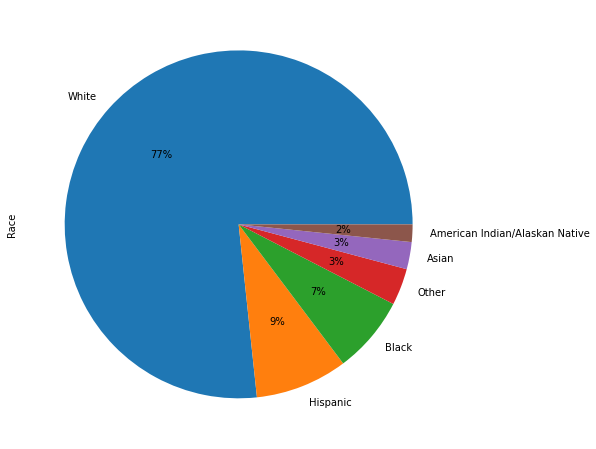

In [27]:
df['Race'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.0f%%')

<AxesSubplot:ylabel='Sex'>

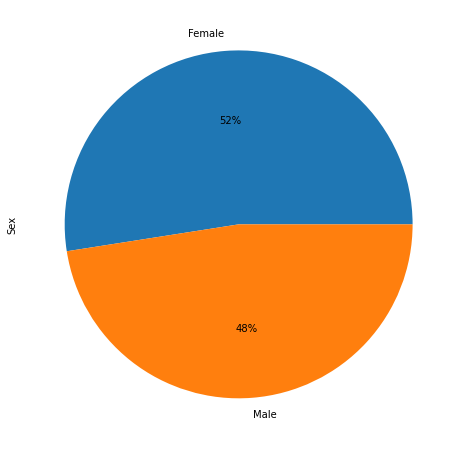

In [28]:
df['Sex'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.0f%%')

<AxesSubplot:ylabel='GenHealth'>

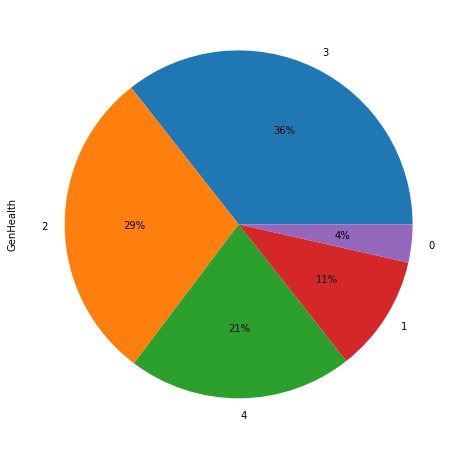

In [29]:
df['GenHealth'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.0f%%')

<AxesSubplot:ylabel='Diabetic'>

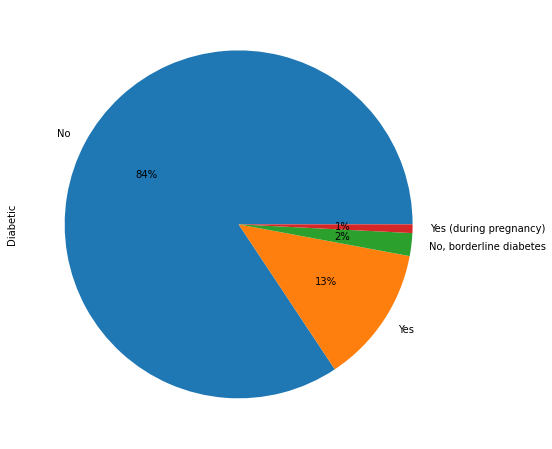

In [30]:
df['Diabetic'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.0f%%')

<AxesSubplot:ylabel='HeartDisease'>

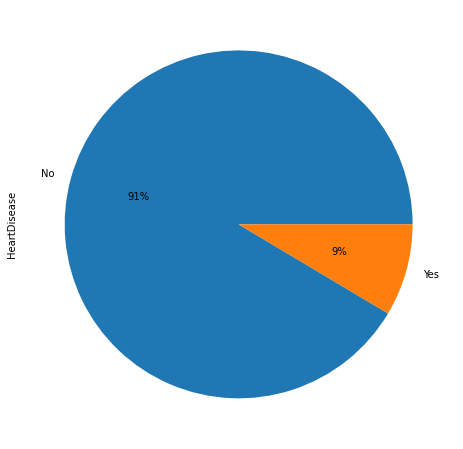

In [31]:
df['HeartDisease'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.0f%%')

<AxesSubplot:ylabel='Frequency'>

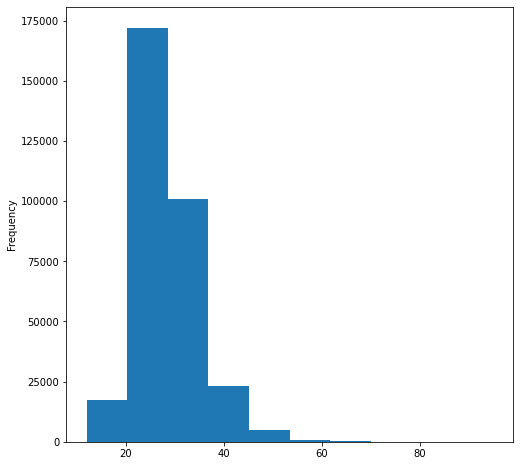

In [32]:
df['BMI'].plot(kind='hist',figsize=(8,8))

# Choose the best technique to deal with imbalance data

In [33]:
#drop because it is not needed
df_new.drop(['Race'], axis=1, inplace=True)

In [34]:
#change datatype to work wit dataset
df_new = df_new.astype({col: int for col in df_new.columns[:17]})

In [35]:
#check imbalance
df=df_new
df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [36]:
#train test split
from sklearn.model_selection import train_test_split

y = df.HeartDisease
X = df.drop(['HeartDisease'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [37]:
#under sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

x_rus, y_rus = rus.fit_resample(X_train, y_train)

In [38]:
#oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X_train, y_train)

In [39]:
#proportion of target value in oversampling
y_ros.value_counts()

0    204660
1    204660
Name: HeartDisease, dtype: int64

In [40]:
#proportion of target value in undersampling
y_rus.value_counts()

0    19196
1    19196
Name: HeartDisease, dtype: int64

In [41]:
#use LogR to check which is the best
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
df.dtypes

HeartDisease        int32
BMI                 int32
Smoking             int32
AlcoholDrinking     int32
Stroke              int32
PhysicalHealth      int32
MentalHealth        int32
DiffWalking         int32
Sex                 int32
AgeCategory         int32
Diabetic            int32
PhysicalActivity    int32
GenHealth           int32
SleepTime           int32
Asthma              int32
KidneyDisease       int32
SkinCancer          int32
race_white          int64
race_hispanic       int64
race_black          int64
race_other          int64
race_asia           int64
race_american       int64
dtype: object

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Train model
clf_2 = LogisticRegression().fit(x_rus, y_rus)

# Predict on training set
y_pred_rus = clf_2.predict(X_test)
 
# How's our accuracy?
print('accuracy: ', accuracy_score(y_test, y_pred_rus))

TP_lr, FN_lr, FP_lr, TN_lr = confusion_matrix(y_test, y_pred_rus).ravel()
PPV_lr = TP_lr / (FP_lr + TP_lr)
print('Precision: ', PPV_lr)

TPR_lr = TP_lr / (FN_lr + TP_lr)
print('Recall: ' ,TPR_lr)

print('F1-score: ', f1_score(y_test, y_pred_rus, pos_label=0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.752676179655823
Precision:  0.9729106968774925
Recall:  0.7505298420728789
F1-score:  0.8473730252662995


In [44]:
# Train model
clf_3 = LogisticRegression().fit(x_ros, y_ros)

# Predict on training set
y_pred_ros = clf_3.predict(X_test)
 
# How's our accuracy?
print('accuracy: ', accuracy_score(y_test, y_pred_ros) )

TP_lr, FN_lr, FP_lr, TN_lr = confusion_matrix(y_test, y_pred_ros).ravel()
PPV_lr = TP_lr / (FP_lr + TP_lr)
print('Precision: ', PPV_lr)

TPR_lr = TP_lr / (FN_lr + TP_lr)
print('Recall: ', TPR_lr)

print('F1-score: ', f1_score(y_test, y_pred_ros, pos_label=0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.7544585622114052
Precision:  0.9725472878486788
Recall:  0.7528315216152777
F1-score:  0.8486997180420945


In [45]:
#The third technique is SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [46]:
#proportion of target value in training dataset after SMOTE
y_res.value_counts()

0    204660
1    204660
Name: HeartDisease, dtype: int64

In [47]:
# Train model
clf_4 = LogisticRegression().fit(X_res, y_res)

# Predict on training set
y_pred_res = clf_4.predict(X_test)
 
# How's our accuracy?
print('accuracy: ', accuracy_score(y_test, y_pred_res) )

TP_lr, FN_lr, FP_lr, TN_lr = confusion_matrix(y_test, y_pred_res).ravel()
PPV_lr = TP_lr / (FP_lr + TP_lr)
print('Precision: ', PPV_lr)

TPR_lr = TP_lr / (FN_lr + TP_lr)
print('Recall: ', TPR_lr)

print('F1-score: ', f1_score(y_test, y_pred_res, pos_label=0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.7697286817665392
Precision:  0.9576561759540602
Recall:  0.7828900891046239
F1-score:  0.8614991097625198


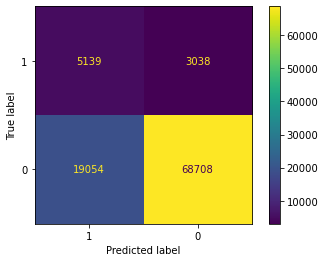

In [48]:
#Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_4, X_test, y_test, labels = [1, 0])  

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_res, y_res)
y_pred_rfc=rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_rfc))
TP_rfc, FN_rfc, FP_rfc, TN_rfc = confusion_matrix(y_test, y_pred_rfc).ravel()
PPV_rfc = TP_rfc / (FP_rfc + TP_rfc)
print('Precision: ', PPV_rfc)

TPR_rfc = TP_rfc / (FN_rfc + TP_rfc)
print('Recall: ', TPR_rfc)

print('F1-score: ', f1_score(y_test, y_pred_rfc, pos_label=0))

Accuracy: 0.831267784738219
Precision:  0.9357997028666066
Recall:  0.8756181490850254
F1-score:  0.904709206498705


In [51]:
# rfc=RandomForestClassifier(random_state=42)

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_res, y_res)

# CV_rfc.best_params_

In [52]:
#with hyperparameters
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1.fit(X_res, y_res)
y_pred_rfc1=rfc1.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_rfc1))
TP_rfc1, FN_rfc1, FP_rfc1, TN_rfc1 = confusion_matrix(y_test, y_pred_rfc1).ravel()
PPV_rfc1 = TP_rfc1 / (FP_rfc1 + TP_rfc1)
print('Precision: ', PPV_rfc1)

TPR_rfc1 = TP_rfc1 / (FN_rfc1 + TP_rfc1)
print('Recall: ', TPR_rfc1)

print('F1-score: ', f1_score(y_test, y_pred_rfc1, pos_label=0))

Accuracy: 0.7556051240892651
Precision:  0.9633044706017951
Recall:  0.7618559285339896
F1-score:  0.8508185352259642


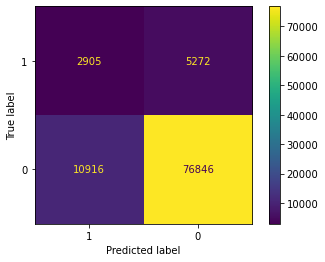

In [53]:
#Confusion matrix without HP
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test, labels = [1, 0])

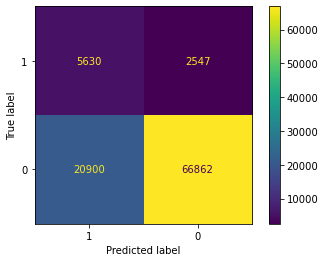

In [54]:
#Confusion matrix with HP
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc1, X_test, y_test, labels = [1, 0])

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_res, y_res)

tree_pred = tree.predict(X_test)
print(accuracy_score(y_test, tree_pred))
TP_tree, FN_tree, FP_tree, TN_tree = confusion_matrix(y_test, tree_pred).ravel()
PPV_tree = TP_tree / (FP_tree + TP_tree)
print('Precision: ', PPV_tree)

TPR_tree = TP_tree / (FN_tree + TP_tree)
print('Recall: ', TPR_tree)

print('F1-score: ', f1_score(y_test, tree_pred, pos_label=0))

0.8046467025922722
Precision:  0.9343502995519307
Recall:  0.8458786262847245
F1-score:  0.8879160835815183


In [56]:
# from sklearn.model_selection import GridSearchCV, cross_val_score

# tree_params = {"max_depth": range(1, 11), "max_features": range(4, 19), "splitter":("best", "random")}

# tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

# tree_grid.fit(X_res, y_res)

# tree_grid.best_params_

In [57]:
tree1 = DecisionTreeClassifier(max_depth=10, random_state=17, splitter='best')
tree1.fit(X_res, y_res)

tree_pred1 = tree1.predict(X_test)
print(accuracy_score(y_test, tree_pred1))
TP_tree1, FN_tree1, FP_tree1, TN_tree1 = confusion_matrix(y_test, tree_pred1).ravel()
PPV_tree1 = TP_tree1 / (FP_tree1 + TP_tree1)
print('Precision: ', PPV_tree1)

TPR_tree1 = TP_tree1 / (FN_tree1 + TP_tree1)
print('Recall: ', TPR_tree1)

print('F1-score: ', f1_score(y_test, tree_pred1, pos_label=0))

0.7577210519184064
Precision:  0.9572890678158312
Recall:  0.769478817711538
F1-score:  0.85317044205526


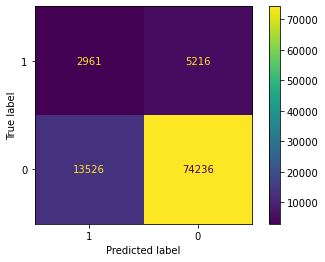

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test, labels = [1, 0])

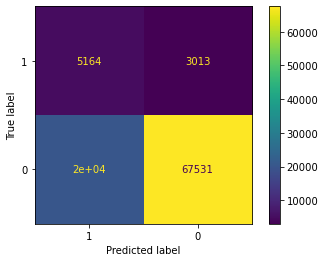

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree1, X_test, y_test, labels = [1, 0])

# KNN

In [60]:
# Importing knn model
from sklearn.neighbors import KNeighborsClassifier

# Creating and fitting the training data to the model
knn = KNeighborsClassifier()
knn.fit(X_res, y_res)

# Prediction values
knn_pred = knn.predict(X_test)

# Printing accuracy and other scores
print("Accuracy:",accuracy_score(y_test, knn_pred))

TP_knn, FN_knn, FP_knn, TN_knn = confusion_matrix(y_test, knn_pred).ravel()

PPV_knn = TP_knn / (FP_knn + TP_knn)
print('Precision: ', PPV_knn)

TPR_knn = TP_knn / (FN_knn + TP_knn)
print('Recall: ', TPR_knn)

print('F1-score: ', f1_score(y_test, knn_pred, pos_label=0))

Accuracy: 0.732454997446294
Precision:  0.9511202813053965
Recall:  0.7458581162690002
F1-score:  0.836075205640423


In [61]:
# # GridSearch model to find the best hyperparameters
# from sklearn.model_selection import GridSearchCV
  
  # Possible hyperparameters 
# grid_params = {
#     'n_neighbors': [3,5,9,15],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
  
  #GridSearch model
# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

  # Fitting the training data
# gs_results = gs.fit(X_res, y_res)

  # Printing the best parameters
# gs_results.best_params_

# Evaluation

In [64]:
# ROC, AUC score of each model
from sklearn.metrics import roc_curve, roc_auc_score
auc_lr = roc_auc_score(y_test, y_pred_res)
auc_rfc = roc_auc_score(y_test, y_pred_rfc)
auc_tree = roc_auc_score(y_test, tree_pred)
auc_knn = roc_auc_score(y_test, knn_pred)
auc_tree1 = roc_auc_score(y_test, tree_pred1)
auc_rfc1 = roc_auc_score(y_test, y_pred_rfc1)
print(auc_rfc1)
print(auc_tree1)

0.7251862497017508
0.7005031363842025


#### Before GridSearch

In [66]:
# Evaluation table before applying the best hyperparameters of each model
ev_df = pd.DataFrame({'model':['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN'], 
                        'Accuracy':[accuracy_score(y_test, y_pred_res), 
                                    accuracy_score(y_test, y_pred_rfc),
                                    accuracy_score(y_test, tree_pred),
                                    accuracy_score(y_test, knn_pred)
                                    ]})

ev_df['Precision'] = [PPV_lr, PPV_rfc, PPV_tree, PPV_knn]
ev_df['Recall'] = [TPR_lr, TPR_rfc, TPR_tree, PPV_knn]
ev_df['F1-Score'] = [f1_score(y_test, y_pred_res, pos_label=0), f1_score(y_test, y_pred_rfc, pos_label=0), 
                     f1_score(y_test, tree_pred, pos_label=0), f1_score(y_test, knn_pred, pos_label=0)]
ev_df['auc'] = [auc_lr, auc_rfc, auc_tree, auc_knn]

ev_df

,model,Accuracy,Precision,Recall,F1-Score,auc
0,Logistic Regression,0.769729,0.957656,0.782890,0.861499,0.705680
1,Random Forest,0.831268,0.935800,0.875618,0.904709,0.615441
2,Decision Tree,0.804647,0.934350,0.845879,0.887916,0.603996
3,KNN,0.732455,0.951120,0.951120,0.836075,0.667230


#### After GirdSearch

In [63]:
# Evaluation table after appying the best hyperparameters
eval_df = pd.DataFrame({'model':['Logistic Regression', 'Random Forest', 'Decision Tree'], 
                        'Accuracy':[accuracy_score(y_test, y_pred_res), 
                                    accuracy_score(y_test, y_pred_rfc1),
                                    accuracy_score(y_test, tree_pred1)
                                    ]})

eval_df['Precision'] = [PPV_lr, PPV_rfc1, PPV_tree1]
eval_df['Recall'] = [TPR_lr, TPR_rfc1, TPR_tree1]
eval_df['F1-Score'] = [f1_score(y_test, y_pred_res, pos_label=0), f1_score(y_test, y_pred_rfc1, pos_label=0), f1_score(y_test, tree_pred1, pos_label=0)]
eval_df['auc'] = [auc_lr, auc_rfc1, auc_tree1]

eval_df

,model,Accuracy,Precision,Recall,F1-Score,auc
0,Logistic Regression,0.769729,0.957656,0.782890,0.861499,0.705680
1,Random Forest,0.755605,0.963304,0.761856,0.850819,0.725186
2,Decision Tree,0.757721,0.957289,0.769479,0.853170,0.700503
